This notebook illustrates the features of the dark_showers.py package. The main utility is the routine which generates the pythia 8 configuration cards for the models described in arXiv 2103.01238. 

5 decay portals were implemented:
- photon portal: decay to photons
- gluon portal: decay to gluons
- vector portal: decay through mixing with SM photon
- higgs portal: decay through mixing with the SM Higgs
- dark photon: decay to light dark photons, which in turn decay through mixing with the SM photon

For each portal, the following functionalities have been implemented:
- branching ratios as function of mass
- decay length as function of mass and coupling
- minimum decay length as a function of mass, derived from the theory priors laid out in arXiv 2103.01238. 
- citation function, which prints out the citation strings for the theory papers which ought to be cited for a particular portal
- function that writes out a pythia 8 configuration card

In this notebook, we give examples of these functions by using the higgs portal. Other portals are analoguous.

In [1]:
## make plots inline - for ipython notebooks
%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt
from matplotlib import rc, rcParams, colors

# Make use of TeX\ufeff
rc('text',usetex=True)
# Change all fonts to 'Computer Modern'
rc('font',**{'size':16, 'family':'serif','serif':['Times New Roman']})


# Change all fonts to 'Computer Modern'
rc('font',**{'size':16, 'family':'serif','serif':['Times New Roman']})
rc('xtick.major', size=5, pad=10)
rc('xtick', labelsize=16)
rc('ytick.major', size=5, pad=10)
rc('ytick', labelsize=16)


# initializing the package

Make sure dark_shower.py is in your python path

In [2]:
from dark_shower import dark_shower
# make a dark shower object, specifying the decay portal using the mandatory "portal" flag. 
# The value of this flag must be "photon", "vector", "gluon", "higgs" or "darkphoton"
test=dark_shower()

Error: portal flag should be one of the following: photon, vector, gluon, higgs or darkphoton


In [3]:
# We take the higgs portal as an example.
# The code prints out a warning to alert to theory uncertainties associated with this particular model.
higgs_portal=dark_shower(portal="higgs")
dark_photon_portal=dark_shower(portal="darkphoton")

Higgs portal warning: 4pi, 2eta and 2rho branching ratios are unknown and were not included. As a result, branching ratio to Kaons in the 1 GeV to 2 GeV mass regime is likely slightly inflated. See 1809.01876
darkphoton/vector portal Warning: only most important branching ratios were included. For full list, see 1505.07459


# decay modes

In [4]:
# print out the available decay modes
# W*W*,Z*Z*,ZZ* and WW* modes have been neglected, as they are only relevant for a mass ~ 100 GeV.
for mode in higgs_portal.decay_PDG_codes.keys():
    print(mode)

pi+ pi-
pi0 pi0
K+ K-
K0 K0bar
gluon gluon
s sbar
c cbar
b bbar
e+ e-
mu+ mu-
tau+ tau-
gamma gamma


Text(0.5, 1.04, '$\\pi \\pi$')

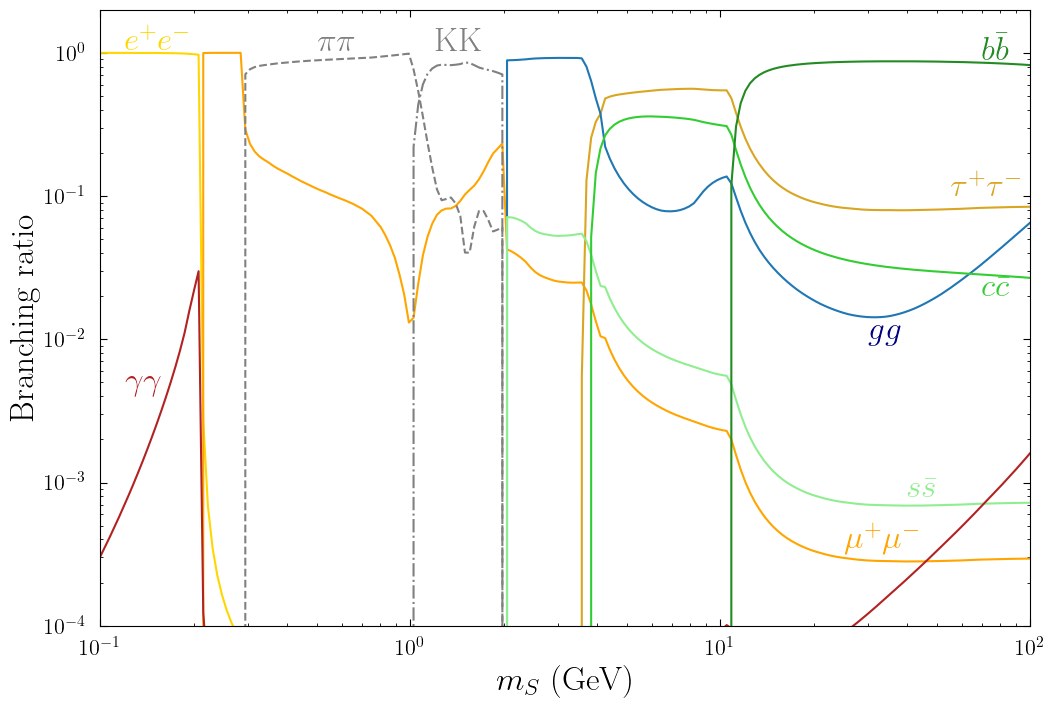

In [6]:
font=24

x=np.logspace(-1,2,200)

fig, ax1 = plt.subplots(figsize=(12,8))

ylist=list(map(lambda t: higgs_portal.branching_ratios['e+ e-'](t),x))
ax1.plot(x,ylist,label=r'$e^+ e^-$',color="gold")    

ylist=list(map(lambda t: higgs_portal.branching_ratios['mu+ mu-'](t),x))
ax1.plot(x,ylist,label=r'$\mu^+ \mu^-$',color="orange")   

ylist=list(map(lambda t: higgs_portal.branching_ratios['tau+ tau-'](t),x))
ax1.plot(x,ylist,label=r'$\tau^+ \tau^-$',color="goldenrod")   

ylist=list(map(lambda t: higgs_portal.branching_ratios['gluon gluon'](t),x))
ax1.plot(x,ylist,label=r'$gg$')   

ylist=list(map(lambda t: higgs_portal.branching_ratios['s sbar'](t),x))
ax1.plot(x,ylist,label=r'$s \bar s$',color="lightgreen")  

ylist=list(map(lambda t: higgs_portal.branching_ratios['c cbar'](t),x))
ax1.plot(x,ylist,label=r'$c \bar c$',color="limegreen")   

ylist=list(map(lambda t: higgs_portal.branching_ratios['b bbar'](t),x))
ax1.plot(x,ylist,label=r'$b \bar b$',color="forestgreen") 


ylist=list(map(lambda t: (higgs_portal.branching_ratios['gamma gamma'](t)),x))
ax1.plot(x,ylist,label=r'$Z Z$',color="firebrick") 


ylist=list(map(lambda t:  (higgs_portal.branching_ratios['pi0 pi0'](t)+higgs_portal.branching_ratios['pi+ pi-'](t)),x))
ax1.plot(x,ylist,"--",label="pi pi",color="gray")

ylist=list(map(lambda t:  (higgs_portal.branching_ratios['K+ K-'](t)+higgs_portal.branching_ratios['K0 K0bar'](t)),x))
ax1.plot(x,ylist,"-.",label="K K",color="gray")

ax1.set_xlabel(r"$m_S$ (GeV)",fontsize=font)
ax1.set_ylabel("Branching ratio",fontsize=font)    
ax1.set_xscale("log")
ax1.set_yscale("log")
ax1.set_ylim([1e-4,2])
ax1.set_xlim([1e-1,1e2])

ax1.tick_params(
    direction='in',
    axis='both',          
    which='both',      
    top=True, 
    right=True)


ax1.text(0.12,1.05,r'$e^+ e^-$',color="gold",fontsize=font)    
ax1.text(25,3.5e-4,r'$\mu^+ \mu^-$',color="orange",fontsize=font)   
ax1.text(55,1e-1,r'$\tau^+ \tau^-$',color="goldenrod",fontsize=font)   

ax1.text(30,1e-2,r'$gg$',color="navy",fontsize=font)   

ax1.text(40,0.8e-3,r'$s \bar s$',color="lightgreen",fontsize=font)  
ax1.text(70,2e-2,r'$c \bar c$',color="limegreen",fontsize=font)   
ax1.text(70,0.9,r'$b \bar b$',color="forestgreen",fontsize=font) 

ax1.text(0.12,4.4e-3,r'$\gamma\gamma$',color="firebrick",fontsize=font) 

ax1.text(1.2,1.04,r'KK',color="gray",fontsize=font) 
ax1.text(0.5,1.04,r'$\pi \pi$',color="gray",fontsize=font) 

# lifetime

We can plot the lifetime as a function of the mass, fixing the mixing angle with the higgs to a reference value. The function is used as follows 

In [7]:
m_test=1.0 # in units of GeV
stheta_test=1e-4 # dimensionless mixing angle
higgs_portal.ctau(m_test,stheta_test) # ctau in units of cm

2.9110860662098332

For the conventions used for the various models we refer to paper. We can plot the lifetime

(0.001, 1000000000.0)

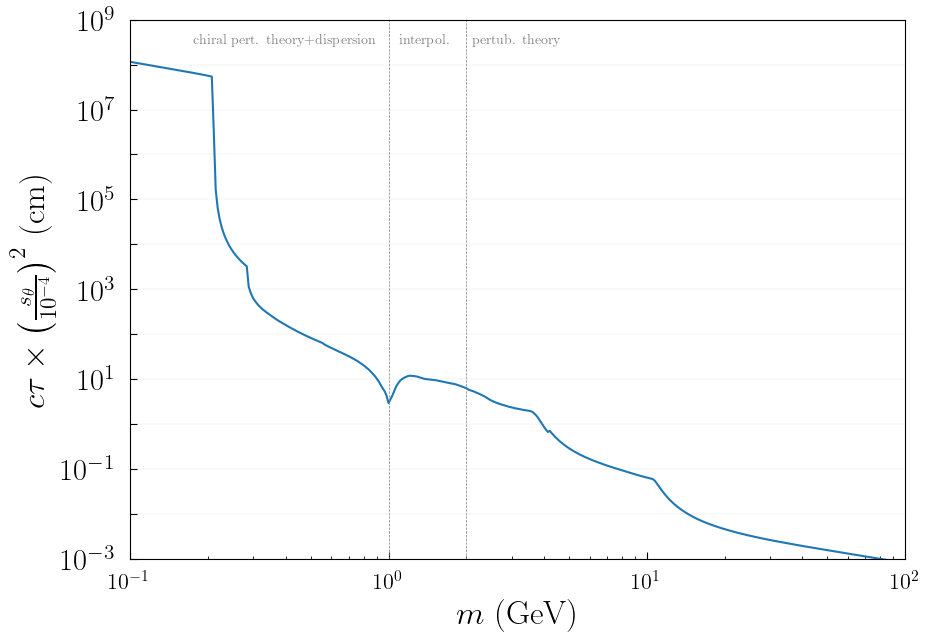

In [9]:
font=24
ticklabels=["$10^{-3}$", "", "$10^{-1}$", "", "$10^{1}$", "", "$10^{3}$","", "$10^{5}$", "",
            "$10^{7}$", "", "$10^{9}$"]

x=np.logspace(-1,2,400)
ymine=list(map(lambda t: higgs_portal.ctau(t,1e-4),x))

from matplotlib import gridspec

fig = plt.figure(figsize=(10, 7)) 
gs = gridspec.GridSpec(1,1) 
ax1 = plt.subplot(gs[0])

ax1.plot(x,ymine)
ax1.set_xlabel(r"$m$ (GeV)",fontsize=font)
ax1.set_ylabel(r"$c\tau\times \left(\frac{s_\theta}{10^{-4}}\right)^2$ (cm)",fontsize=font)
ax1.set_xscale("log")
ax1.set_yscale("log")

ax1.plot([1.0,1.0],[1e-3,1e9],"--",color="gray",linewidth=0.5)
ax1.plot([2,2],[1e-3,1e9],"--",color="gray",linewidth=0.5)
ax1.text(0.9,3e8,"chiral pert. theory+dispersion",color='gray',fontsize=10,horizontalalignment="right")
ax1.text(1.1,3e8,"interpol.",color='gray',fontsize=10,horizontalalignment="left")
ax1.text(2.1,3e8,"pertub. theory",color='gray',fontsize=10,horizontalalignment="left")
ax1.set_yticks(np.logspace(-3,9,13))
ax1.set_yticklabels(ticklabels,fontsize=22)
ax1.grid(axis="y",linewidth=0.1)

ax1.set_xlim([1e-1,1e2])
ax1.set_ylim([1e-3,1e9])

# minimum lifetime

In the context of dark shower models, one can derive an approximate lower bound on the lifetime as a function of the dark meson mass. (See paper for details.) This bound is different for each portal and can be accessed with the function

In [10]:
m_test=5.0 # in units of GeV
higgs_portal.ctau_min(m_test) # in units of cm

2.710453671345393

(0.001, 1000000000.0)

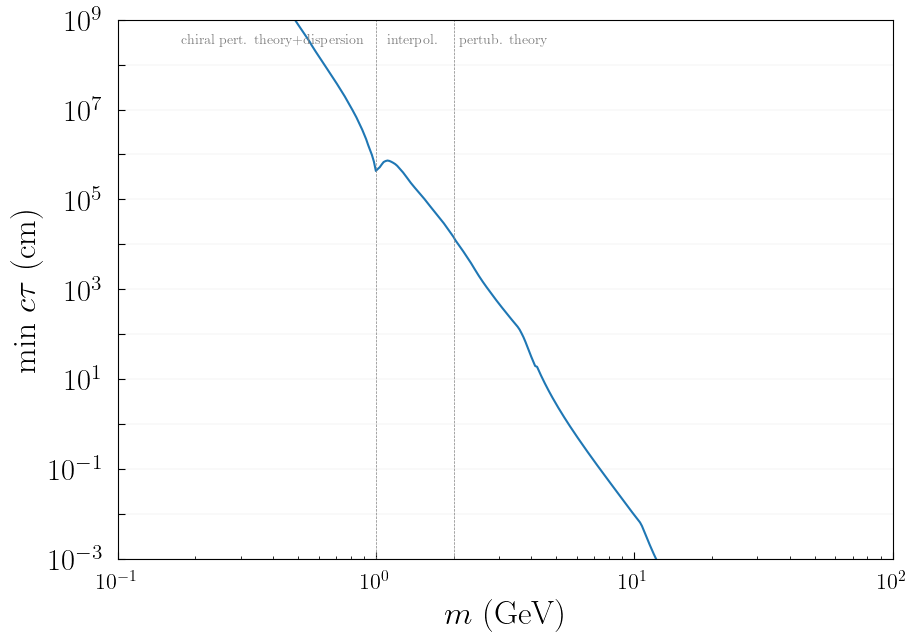

In [12]:
x=np.logspace(-1,2,400)
ymine=list(map(lambda t: higgs_portal.ctau_min(t),x))

fig = plt.figure(figsize=(10, 7)) 
gs = gridspec.GridSpec(1,1) 
ax1 = plt.subplot(gs[0])

ax1.plot(x,ymine)
ax1.set_xlabel(r"$m$ (GeV)",fontsize=font)
ax1.set_ylabel(r"min $c\tau$ (cm)",fontsize=font)
ax1.set_xscale("log")
ax1.set_yscale("log")

ax1.plot([1.0,1.0],[1e-3,1e9],"--",color="gray",linewidth=0.5)
ax1.plot([2,2],[1e-3,1e9],"--",color="gray",linewidth=0.5)
ax1.text(0.9,3e8,"chiral pert. theory+dispersion",color='gray',fontsize=10,horizontalalignment="right")
ax1.text(1.1,3e8,"interpol.",color='gray',fontsize=10,horizontalalignment="left")
ax1.text(2.1,3e8,"pertub. theory",color='gray',fontsize=10,horizontalalignment="left")
ax1.set_yticks(np.logspace(-3,9,13))
ax1.set_yticklabels(ticklabels,fontsize=22)
ax1.grid(axis="y",linewidth=0.1)

ax1.set_xlim([1e-1,1e2])
ax1.set_ylim([1e-3,1e9])

# writing out a Pythia 8 card

The low energy spectrum of the simplified dark sector model consists out of a dark pion and a dark rho. Dark baryons are neglected. The other parameters are:
- dark confinement scale, \Lambda, which is the energy where the parton shower stops and hadronization begins.
- number of colors, Nc, which largely just affects the shape of the parton shower.
- number of flavors, Nf. For Nf=1, there are no "charged" pions, and all pions can in principle decay. Models with Nf>1 will have "charged" pions, like in the standard model, which are taken to be stable. Such models have more MET. (semi-visible jets) 

The flags that can be specified are the following:
- m: mass of the dark pion ($\tilde \eta$), in GeV
- xi_omega: $m_{\tilde \omega}$/$m_{\tilde \eta}$. We expect this parameter to be xi_omega>1
- xi_Lambda: ${\tilde \Lambda}$/$m_{\tilde \eta}$. We expect this parameter to be xi_Lambda>1
- ctau: proper lifetime of the unstable meson, in cm. For the vector portal the $\tilde{\omega}$ is unstable, for the higgs, gluon and photon portals this refers to the lifetime of the $\tilde{\eta}$. For the dark photon portal, this parameter sets the lifetime of the dark photon ($A'$).
- Nc: number of colors in dark sector, should be positive integer
- Nf: number of flavors in dark sector, should be positive integer
- mH: mass of the heavy particle (e.g. Higgs) that decays into the dark sector. Production through gluon fusion is assumed.
- mayDecay: allow the hidden sector particles to decay. Default is "True", "False" is useful for debugging mostly, or for performing certain truthlevel studies. 
- userName: name of person generating the pythia card

The function will print a warning if the lifetime is too low to be theoretically well motivated.

In [13]:
# writing out a pythia card

masses = [1,2,3,5,10]
ctau=10

def to_cm(mm):
    return mm/10.

for mass in masses:

    
    higgs_portal.pythia_card("higgsportal_m-{}_ctau-{}.cmnd".format(mass,ctau),
                             m=mass,
                             xi_omega=1.0,
                             xi_Lambda=1.0,
                             ctau=to_cm(ctau), #takes in cm
                             Nc=3,
                             Nf=1,
                             mH=125,
                             mayDecay=True,
                             userName="Albert Einstein")

Warning, requested lifetime may not be theoretically consistent.
Warning, requested lifetime may not be theoretically consistent.
Warning, requested lifetime may not be theoretically consistent.
Warning, requested lifetime may not be theoretically consistent.


# Citation

prints bibtex entry of the paper where the branching ratios were computed.

In [11]:
higgs_portal.citation()

Branching ratios for this portal are based on:

        @article{Winkler:2018qyg,
        author = "Winkler, Martin Wolfgang",
        title = "{Decay and detection of a light scalar boson mixing with the Higgs boson}",
        eprint = "1809.01876",
        archivePrefix = "arXiv",
        primaryClass = "hep-ph",
        reportNumber = "NORDITA-2018-087",
        doi = "10.1103/PhysRevD.99.015018",
        journal = "Phys. Rev. D",
        volume = "99",
        number = "1",
        pages = "015018",
        year = "2019"
        }
        
        @article{Djouadi:1995gt,
        author = "Djouadi, A. and Spira, M. and Zerwas, P. M.",
        title = "{QCD corrections to hadronic Higgs decays}",
        eprint = "hep-ph/9511344",
        archivePrefix = "arXiv",
        reportNumber = "DESY-95-210, KA-TP-8-95",
        doi = "10.1007/s002880050120",
        journal = "Z. Phys. C",
        volume = "70",
        pages = "427--434",
        year = "1996"
        }
        
